In [ ]:
import pandas as pd
import os 
dataset_path = r'Dataset\merged_emails.csv'
df = pd.read_csv(dataset_path)


In [10]:
import pandas as pd

def summarize_dataframe(df):
    summary = pd.DataFrame({
        "DataType": df.dtypes,
        "Non-Null Count": df.count(),
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "First Value": df.iloc[0],
        "Sample Values": df.apply(lambda x: x.unique()[:5])
    })
    
    # Optional: Add top 5 value counts per column as a dictionary
    value_counts = {}
    for col in df.columns:
        value_counts[col] = df[col].value_counts().head(5).to_dict()
    
    summary["Top 5 Value Counts"] = pd.Series(value_counts)
    
    return summary

summary_table = summarize_dataframe(df)
print(summary_table)


         DataType  Non-Null Count  Missing Values  Unique Values  \
sender     object          104713           32964          62549   
receiver   object          102700           34977          12127   
date       object          104538           33139         101169   
subject    object          136818             859          78344   
body       object          137676               1         135874   
label       int64          137677               0              2   
urls      float64          105051           32626              2   

                                                First Value  \
sender                     Young Esposito <Young@iworld.de>   
receiver                        user4@gvc.ceas-challenge.cc   
date                        Tue, 05 Aug 2008 16:31:02 -0700   
subject                           Never agree to be a loser   
body      Buck up, your troubles caused by small dimensi...   
label                                                     1   
urls          

In [12]:
!pip install nltk

  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 9.3 MB/s  0:00:00


In [18]:
# Data preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
import re
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rrpra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rrpra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rrpra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [15]:
# Visualization
import matplotlib.pyplot as plt
from collections import Counter
#from wordcloud import WordCloud

In [ ]:
pip

In [ ]:

# Feature Engineering

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [20]:
df['subject'] = df['subject'].str.lower()
df['body'] = df['body'].str.lower()
def remove_special_characters(word):
    return str(word).translate(str.maketrans('', '', string.punctuation))

df['subject'] = df['subject'].apply(remove_special_characters)
df['body'] = df['body'].apply(remove_special_characters)

In [21]:

# Define stop-words in English
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

def remove_stop_words(words):
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

# Tokenize the text
df['body'] = df['body'].apply(word_tokenize)

# Remove stop words
df['body'] = df['body'].apply(remove_stop_words)

# Rejoin words for EDA
df['body'] = df['body'].apply(' '.join)

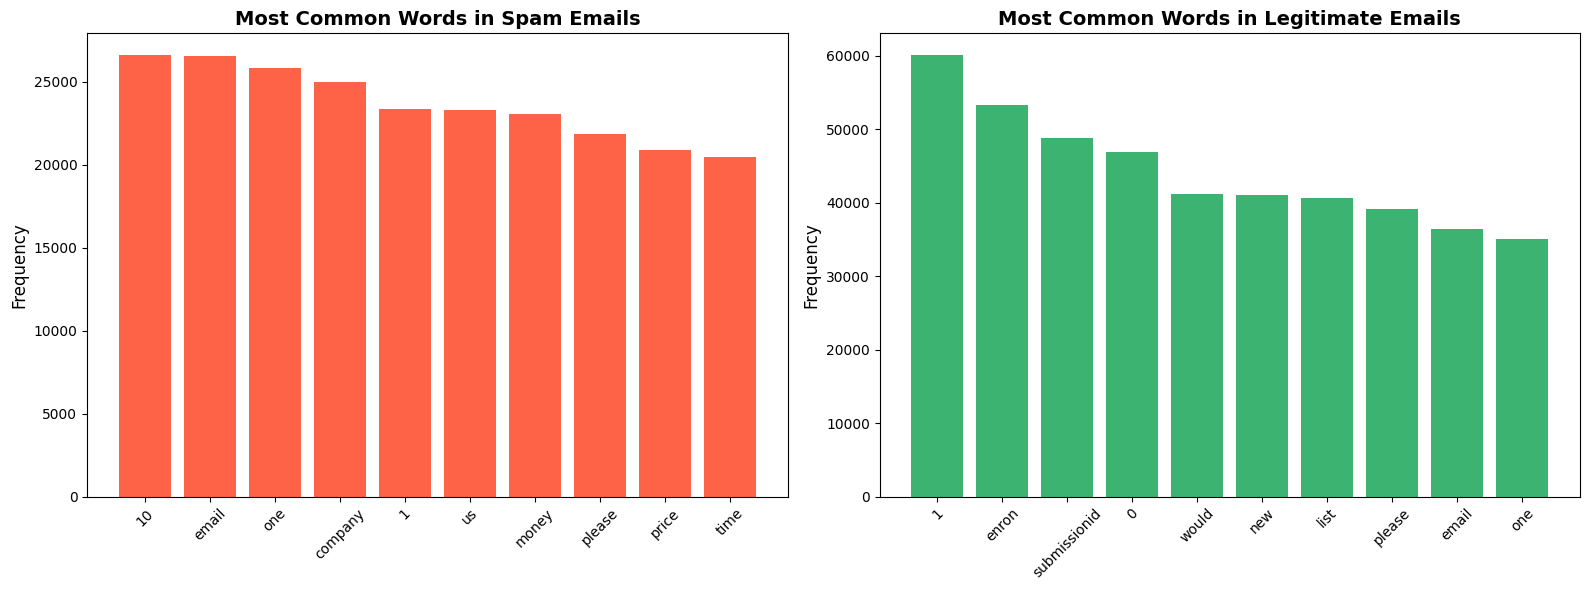

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Separate the spam and legitimate emails
spam_emails = df.loc[df['label'] == 1, 'body']
legit_emails = df.loc[df['label'] == 0, 'body']

# Define a function to count word frequencies
def count_word_frequencies(email_series):
    word_counter = Counter()
    email_series.str.split().apply(word_counter.update)
    return word_counter

# Count word frequencies for spam and legitimate emails
spam_words = count_word_frequencies(spam_emails)
legit_words = count_word_frequencies(legit_emails)

# Get the 10 most common words for each category
spam_common = spam_words.most_common(10)
legit_common = legit_words.most_common(10)

# Convert to DataFrames for visualization
spam_common_df = pd.DataFrame(spam_common, columns=['Word', 'Frequency'])
legit_common_df = pd.DataFrame(legit_common, columns=['Word', 'Frequency'])

# Set up the figure for plotting
plt.figure(figsize=(16, 6))

# Plot the most common words in spam emails
plt.subplot(1, 2, 1)
plt.bar(spam_common_df['Word'], spam_common_df['Frequency'], color='tomato')
plt.title('Most Common Words in Spam Emails', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Frequency', fontsize=12)

# Plot the most common words in legitimate emails
plt.subplot(1, 2, 2)
plt.bar(legit_common_df['Word'], legit_common_df['Frequency'], color='mediumseagreen')
plt.title('Most Common Words in Legitimate Emails', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Frequency', fontsize=12)

# Adjust layout for better visual appeal
plt.tight_layout()

# Display the plots
plt.show()


In [23]:
!pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


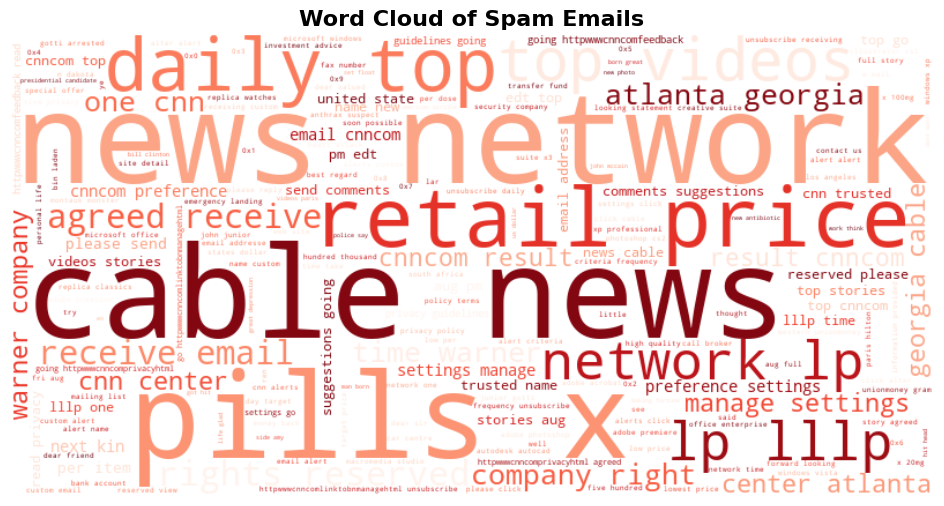

In [24]:

# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image for spam words
spam_wordcloud = WordCloud(
    width=800,  # Width of the image
    height=400,  # Height of the image
    background_color='white',  # Background color for better visibility
    colormap='Reds',  # Color theme to match the spam context
    max_words=200,  # Limit the number of words to show in the cloud
    contour_color='black',  # Optional: Outline color for the word cloud
    contour_width=1  # Optional: Outline width for a polished look
).generate(' '.join(spam_emails))  # Join all spam emails into a single string

# Display the word cloud image
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
plt.imshow(spam_wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smooth display
plt.axis('off')  # Turn off axes for a clean look
plt.title('Word Cloud of Spam Emails', fontsize=16, fontweight='bold')  # Add a descriptive title
plt.show()

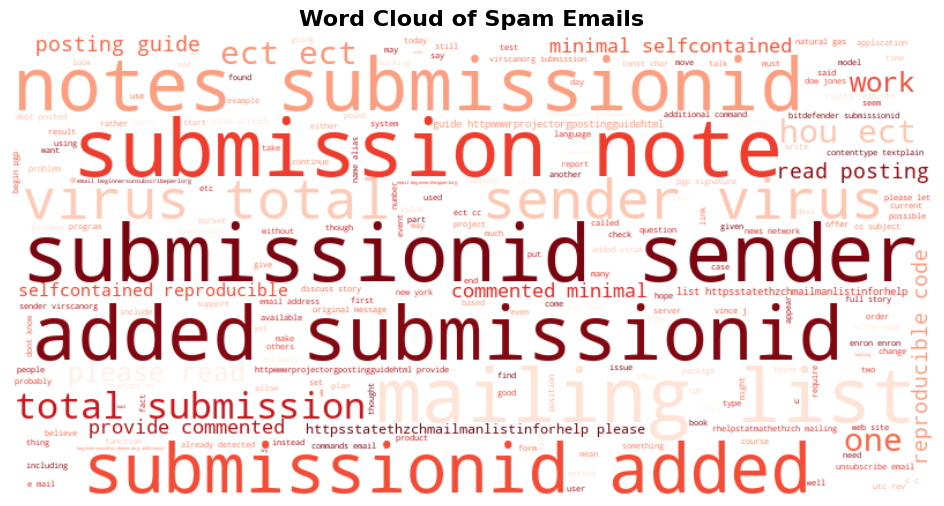

In [25]:

# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image for spam words
spam_wordcloud = WordCloud(
    width=800,  # Width of the image
    height=400,  # Height of the image
    background_color='white',  # Background color for better visibility
    colormap='Reds',  # Color theme to match the spam context
    max_words=200,  # Limit the number of words to show in the cloud
    contour_color='black',  # Optional: Outline color for the word cloud
    contour_width=1  # Optional: Outline width for a polished look
).generate(' '.join(legit_emails))  # Join all spam emails into a single string

# Display the word cloud image
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
plt.imshow(spam_wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smooth display
plt.axis('off')  # Turn off axes for a clean look
plt.title('Word Cloud of Spam Emails', fontsize=16, fontweight='bold')  # Add a descriptive title
plt.show()